<a href="https://colab.research.google.com/github/softconrob/SDG-mapping/blob/main/SDG_mapping_complete_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Complete Workflow
This file contains all the code written for my Bachelor Thesis.
- Reading the data
- Cleaning the data
- Preparing the data
- Quality checking the data
- Plots
- Main modeling part
- Models trained with different data
- Evaluation part

To only check the main model please refer to the other file in this folder: "SDG_mapping_model.ipynb"

Regular quality checks are done and will not be described explicitly.

# Installation and Imports

In this part we install and import most of the necessary libraries and mount the Google Drive to access the data.

In [1]:
# installs

!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 4.9 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=03d747a35dea1188b169032754c4da4cf5a0012bd818439b60b00924c5cb84ee
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [2]:
# imports

import pandas as pd
import numpy as np
from IPython.display import display
from langdetect import detect
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Reading the Data
In this part the data is read

In [3]:
# read data

colnames=['sdg', 'author', 'faculty', 'year', 'paper', 'link', 'kurzfassung'] 
df = pd.read_csv('gdrive/My Drive/complete_sdg_data_with_kurzfassung.csv', names=colnames, sep=';', on_bad_lines='skip')

In [4]:
# describe data

df.shape

df.groupby('sdg').count()

display(df)

df.dtypes

,sdg,author,faculty,year,paper,link,kurzfassung
0,SDG01,"Berndt, Christian",MNF,2016.0,"Behave, global south! Economics, experiments, ...","Behave, global south! Economics, experiments, ...",NaN
1,SDG01,"Berndt, Christian",MNF,2015.0,"Behavioural economics, experimentalism and the...","Behavioural economics, experimentalism and the...",Using market-based pro-poor development policy...
2,SDG01,"Müller-Böker, Ulrike",MNF,2014.0,"“Investors are good, if they follow the rules”...","“Investors are good, if they follow the rules”...",The rapidly increasing interest of foreign inv...
3,SDG01,"Müller-Böker, Ulrike",MNF,2014.0,Negotiating access to land in Nepal. Journal o...,Negotiating access to land in Nepal. Journal o...,In a rural agrarian economy like that of Nepal...
4,SDG01,"Derks, Annuska",PHF,2015.0,Fuelling change: A biography of the beehive co...,Fuelling change: A biography of the beehive co...,NaN
...,...,...,...,...,...,...,...
738,SDG17,"Walter, Stefanie",PHF,2017.0,Globalization and the demand-side of politics:...,Globalization and the demand-side of politics:...,Does globalization affect the demand-side of p...
739,SDG17,"Diggelmann, Oliver",RWF,2017.0,"Stellungnahme zur Volksinitiative ""Schweizer R...","Stellungnahme zur Volksinitiative ""Schweizer R...",NaN
740,SDG17,"Gächter, Thomas",RWF,2017.0,"Stellungnahme zur Volksinitiative ""Schweizer R...","Stellungnahme zur Volksinitiative ""Schweizer R...",NaN
741,SDG17,"Glaser, Andreas",RWF,2017.0,Die Öffentlichkeitsbeteiligung bei umweltrelev...,Die Öffentlichkeitsbeteiligung bei umweltrelev...,NaN


sdg             object
author          object
faculty         object
year           float64
paper           object
link            object
kurzfassung     object
dtype: object

# Data cleaning and processing
In this code section the data is being cleaned and processed.

In [5]:
# preprocess data: column types, languages, drop nulls

df = df.astype({'kurzfassung':'string'})
df = df.astype({'sdg':'string'})
df = df.astype({'paper':'string'})
df = df.astype({'link':'string'})

df[['kurzfassung']] = df[['kurzfassung']].fillna(value='unknown')

df = df.drop(df[df.kurzfassung == 'unknown'].index)


def language_detect(x):
    lang = detect(x)
    return lang

df['language'] = df['kurzfassung'].apply(language_detect)


df.groupby('language').count()

df = df.astype({'language':'string'})

df = df.drop(df[df.language == 'de'].index)

df.groupby('language').count()



,sdg,author,faculty,year,paper,link,kurzfassung
language,,,,,,,
en,401,401,401,401,401,401,401


In [6]:
# sdgs to numbers

df['sdg'] = df['sdg'].str.replace('SDG','') # remove SDG
df['sdg'] = df['sdg'].astype('int') # change column type to integer

In [7]:
# get title

df['paper'] = df['paper'].str.replace('?','.')
df['paper'] = df['paper'].str.replace('!','.')

df['title'] = df.apply(lambda x: x['paper'][0:x['paper'].find('.')],axis=1)


pd.options.display.max_colwidth = 500
display(df.title)
print(df.title)
df.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


1                                                                            Behavioural economics, experimentalism and the marketization of development
2      “Investors are good, if they follow the rules” – power relations and local perceptions in the case of two European forestry companies in Tanzania
3                                                                                                                    Negotiating access to land in Nepal
5                                                                                                                           On the psychology of poverty
8                                                                                          Saving more in groups: field experimental evidence from Chile
                                                                             ...                                                                        
734                                                                               

1                                                                            Behavioural economics, experimentalism and the marketization of development
2      “Investors are good, if they follow the rules” – power relations and local perceptions in the case of two European forestry companies in Tanzania
3                                                                                                                    Negotiating access to land in Nepal
5                                                                                                                           On the psychology of poverty
8                                                                                          Saving more in groups: field experimental evidence from Chile
                                                                             ...                                                                        
734                                                                               

Index(['sdg', 'author', 'faculty', 'year', 'paper', 'link', 'kurzfassung',
       'language', 'title'],
      dtype='object')

In [8]:
df.columns

Index(['sdg', 'author', 'faculty', 'year', 'paper', 'link', 'kurzfassung',
       'language', 'title'],
      dtype='object')

In [9]:
# drop faculty, year, paper, link

df2 = df.drop(columns=['language', 'faculty', 'year', 'paper', 'link'])

display(df2)


,sdg,author,kurzfassung,title
1,1,"Berndt, Christian","Using market-based pro-poor development policy in the global South as an example, this paper engages with the rise of behaviourism and experimentalism as a challenge to the neoclassical orthodoxy and the more recent transformation into an influential policy script. After charting the rise of behavioural economics and discussing the key conceptual building blocks of the emerging behavioural mainstream in economics, the paper turns to the marketization of anti-poverty policy in the global Sout...","Behavioural economics, experimentalism and the marketization of development"
2,1,"Müller-Böker, Ulrike","The rapidly increasing interest of foreign investors in land in the global South, also termed land grabbing, has been widely discussed as potentially supportive, but often rather harmful for local populations. Combining a critical livelihoods perspective with access theory and a bargaining model, this study scrutinizes local people’s perceptions of the land investments, power relations during land negotiations and intra-community differences. By analysing two European forestry companies in T...","“Investors are good, if they follow the rules” – power relations and local perceptions in the case of two European forestry companies in Tanzania"
3,1,"Müller-Böker, Ulrike","In a rural agrarian economy like that of Nepal, land has traditionally been a primary source of livelihood and security, as well as a symbol of status. Thousands of poor farmers are completely dependent on land for their livelihoods, yet not all of them have access to or control over this fundamental resource. Negotiation for access to land has been a lengthy and complicated process. It remains so in the changed political context of Nepal, where increasing numbers of emerging actors need to ...",Negotiating access to land in Nepal
5,1,"Fehr, Ernst","Poverty remains one of the most pressing problems facing the world; the mechanisms through which poverty arises and perpetuates itself, however, are not well understood. Here, we examine the evidence for the hypothesis that poverty may have particular psychological consequences that can lead to economic behaviors that make it difficult to escape poverty. The evidence indicates that poverty causes stress and negative affective states which in turn may lead to short-sighted and risk-averse dec...",On the psychology of poverty
8,1,"Pomeranz, Dina","We test the impact of a peer group program on savings in a sample of microcredit clients. We conduct two randomized trials among these 2687 microcredit clients. The first finds that a Savings Group Treatment, which combines public goal setting, monitoring in the group and non-financial rewards, increases savings in a new savings account significantly. The number of deposits grows 3.7-fold and the average balance almost doubles. In contrast, a more classical measure, a substantially increased...",Saving more in groups: field experimental evidence from Chile
...,...,...,...,...
734,17,"Michaelowa, Katharina","The changes observed in resourcing international organisations over the last decades may have dramatic consequences for their ability to fulfil their mandates. This paper investigates into how far reaching the expected changes really are, and whether the new types and sources of financial and human resources can really be considered as causal for these developments. It appears that resourcing may not be the initial cause, but contributes to the centrifugal dynamics currently observed in the ...",Resourcing international organisations: so what
735,17,"Walter, Stefanie","Analyzing international negotiations among the member states of the European Union raises a number of analytical issues, especially in unusual circumstances such as the Eurozone crisis. Our article discusses these issues in the light of existing theory and informed by the empirical analyses assembled in this special issue. ‘National preferences’ or ideal point

In [10]:
df2.columns

Index(['sdg', 'author', 'kurzfassung', 'title'], dtype='object')

In [11]:
# clean author

df2['author'] = df2['author'].str.replace('[^\w\s]','') # remove punctuations
display(df2.author)

df2['author'] = df2['author'].str.replace(r'\b\w\b','').str.replace(r'\s+', ' ') # remove single characters
display(df2.author)

df2['author'] = df2['author'].str.lower()
df2['author'] = df2['author'].str.replace(' ', '') # remove space in name

df2.groupby('author').count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


1          Berndt Christian
2        MüllerBöker Ulrike
3        MüllerBöker Ulrike
5                Fehr Ernst
8             Pomeranz Dina
               ...         
734    Michaelowa Katharina
735         Walter Stefanie
736         Walter Stefanie
737         Walter Stefanie
738         Walter Stefanie
Name: author, Length: 401, dtype: object

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


1          Berndt Christian
2        MüllerBöker Ulrike
3        MüllerBöker Ulrike
5                Fehr Ernst
8             Pomeranz Dina
               ...         
734    Michaelowa Katharina
735         Walter Stefanie
736         Walter Stefanie
737         Walter Stefanie
738         Walter Stefanie
Name: author, Length: 401, dtype: object

,sdg,kurzfassung,title
author,,,
abouchaditarik,5,5,5
algesheimerrené,1,1,1
altermattflorian,9,9,9
alósferrercarlos,1,1,1
backesgellneruschi,1,1,1
...,...,...,...
winkelmannrainer,2,2,2
wirthwerner,5,5,5
yanagizawadrottdavid,4,4,4


In [12]:
import re

# clean title

def clean_text(c):

  
  c = c.str.replace('http[^\s]+', '') # remove links
  c = c.str.replace('\s+', ' ') # remove tabs, enter, linebreaks
  c = c.str.replace('\d+', '') # remove numbers
  c = c.str.replace('[^\w\s]', '') # remove punctuations / symbols
  c = c.str.lower()

  return c

  
df2['title_clean'] = clean_text(df2['title'])

df3 = df2.drop('title', axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()


In [13]:
# clean kurzfassung

df3['kurzfassung_clean'] = clean_text(df3['kurzfassung'])
df4 = df3.drop('kurzfassung', axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()


In [14]:
display(df4)

,sdg,author,title_clean,kurzfassung_clean
1,1,berndtchristian,behavioural economics experimentalism and the marketization of development,using marketbased propoor development policy in the global south as an example this paper engages with the rise of behaviourism and experimentalism as a challenge to the neoclassical orthodoxy and the more recent transformation into an influential policy script after charting the rise of behavioural economics and discussing the key conceptual building blocks of the emerging behavioural mainstream in economics the paper turns to the marketization of antipoverty policy in the global south base...
2,1,müllerbökerulrike,investors are good if they follow the rules power relations and local perceptions in the case of two european forestry companies in tanzania,the rapidly increasing interest of foreign investors in land in the global south also termed land grabbing has been widely discussed as potentially supportive but often rather harmful for local populations combining a critical livelihoods perspective with access theory and a bargaining model this study scrutinizes local peoples perceptions of the land investments power relations during land negotiations and intracommunity differences by analysing two european forestry companies in tanzania w...
3,1,müllerbökerulrike,negotiating access to land in nepal,in a rural agrarian economy like that of nepal land has traditionally been a primary source of livelihood and security as well as a symbol of status thousands of poor farmers are completely dependent on land for their livelihoods yet not all of them have access to or control over this fundamental resource negotiation for access to land has been a lengthy and complicated process it remains so in the changed political context of nepal where increasing numbers of emerging actors need to be cons...
5,1,fehrernst,on the psychology of poverty,poverty remains one of the most pressing problems facing the world the mechanisms through which poverty arises and perpetuates itself however are not well understood here we examine the evidence for the hypothesis that poverty may have particular psychological consequences that can lead to economic behaviors that make it difficult to escape poverty the evidence indicates that poverty causes stress and negative affective states which in turn may lead to shortsighted and riskaverse decisionmak...
8,1,pomeranzdina,saving more in groups field experimental evidence from chile,we test the impact of a peer group program on savings in a sample of microcredit clients we conduct two randomized trials among these microcredit clients the first finds that a savings group treatment which combines public goal setting monitoring in the group and nonfinancial rewards increases savings in a new savings account significantly the number of deposits grows fold and the average balance almost doubles in contrast a more classical measure a substantially increased interest rate has...
...,...,...,...,...
734,17,michaelowakatharina,resourcing international organisations so what,the changes observed in resourcing international organisations over the last decades may have dramatic consequences for their ability to fulfil their mandates this paper investigates into how far reaching the expected changes really are and whether the new types and sources of financial and human resources can really be considered as causal for these developments it appears that resourcing may not be the initial cause but contributes to the centrifugal dynamics currently observed in the mult...
735,17,walterstefanie,analyzing interstate negotiations in the eurozone crisis and beyond,analyzing international negotiations among the member states of the european union raises a number of analytical issues especially in unusual circumstances such as the eurozone crisis our article discusses these issues in the light of existing theory and informed by the empirical analyses assembled in this special issue national prefere

In [15]:
# remove stop words

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop = stopwords.words('english')


def remove_stopwords(c):
    c_tokenized = word_tokenize(c)  
    c_cleaned = [w for w in c_tokenized if not w in stop]  
    
    return c_cleaned
    
df4['title_cleaned'] = df4['title_clean'].apply(remove_stopwords)
df4['kurzfassung_cleaned'] = df4['kurzfassung_clean'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [16]:
display(df4)

,sdg,author,title_clean,kurzfassung_clean,title_cleaned,kurzfassung_cleaned
1,1,berndtchristian,behavioural economics experimentalism and the marketization of development,using marketbased propoor development policy in the global south as an example this paper engages with the rise of behaviourism and experimentalism as a challenge to the neoclassical orthodoxy and the more recent transformation into an influential policy script after charting the rise of behavioural economics and discussing the key conceptual building blocks of the emerging behavioural mainstream in economics the paper turns to the marketization of antipoverty policy in the global south base...,"[behavioural, economics, experimentalism, marketization, development]","[using, marketbased, propoor, development, policy, global, south, example, paper, engages, rise, behaviourism, experimentalism, challenge, neoclassical, orthodoxy, recent, transformation, influential, policy, script, charting, rise, behavioural, economics, discussing, key, conceptual, building, blocks, emerging, behavioural, mainstream, economics, paper, turns, marketization, antipoverty, policy, global, south, based, analysis, policy, documents, project, reports, academic, interventions, ar..."
2,1,müllerbökerulrike,investors are good if they follow the rules power relations and local perceptions in the case of two european forestry companies in tanzania,the rapidly increasing interest of foreign investors in land in the global south also termed land grabbing has been widely discussed as potentially supportive but often rather harmful for local populations combining a critical livelihoods perspective with access theory and a bargaining model this study scrutinizes local peoples perceptions of the land investments power relations during land negotiations and intracommunity differences by analysing two european forestry companies in tanzania w...,"[investors, good, follow, rules, power, relations, local, perceptions, case, two, european, forestry, companies, tanzania]","[rapidly, increasing, interest, foreign, investors, land, global, south, also, termed, land, grabbing, widely, discussed, potentially, supportive, often, rather, harmful, local, populations, combining, critical, livelihoods, perspective, access, theory, bargaining, model, study, scrutinizes, local, peoples, perceptions, land, investments, power, relations, land, negotiations, intracommunity, differences, analysing, two, european, forestry, companies, tanzania, chosen, sector, country, presum..."
3,1,müllerbökerulrike,negotiating access to land in nepal,in a rural agrarian economy like that of nepal land has traditionally been a primary source of livelihood and security as well as a symbol of status thousands of poor farmers are completely dependent on land for their livelihoods yet not all of them have access to or control over this fundamental resource negotiation for access to land has been a lengthy and complicated process it remains so in the changed political context of nepal where increasing numbers of emerging actors need to be cons...,"[negotiating, access, land, nepal]","[rural, agrarian, economy, like, nepal, land, traditionally, primary, source, livelihood, security, well, symbol, status, thousands, poor, farmers, completely, dependent, land, livelihoods, yet, access, control, fundamental, resource, negotiation, access, land, lengthy, complicated, process, remains, changed, political, context, nepal, increasing, numbers, emerging, actors, need, considered, often, conflicting, claims, counterclaims, context, traditional, ways, thinking, need, revised, regar..."
5,1,fehrernst,on the psychology of poverty,poverty remains one of the most pressing problems facing the world the mechanisms through which poverty arises and perpetuates itself however are not well understood here we examine the evidence for the hypothesis that poverty may have particular psychological consequences that can lead to economic behaviors that make it di

In [17]:
df5 = df4.drop(columns=['title_clean', 'kurzfassung_clean'])

# Creating WordClouds

In this section WordClouds for each SDG will be created.

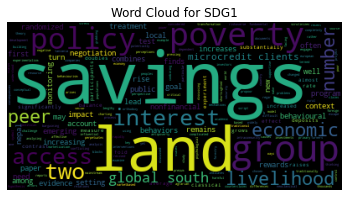

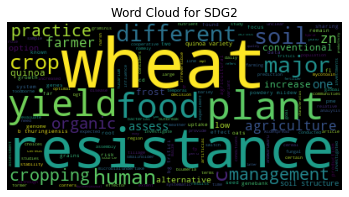

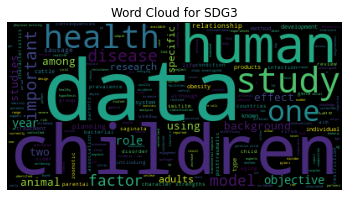

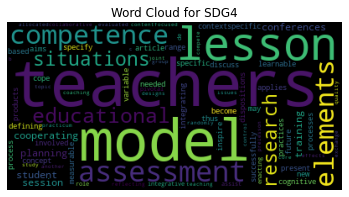

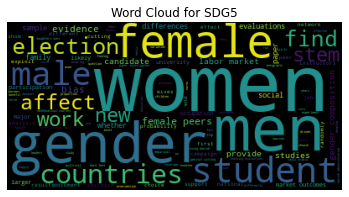

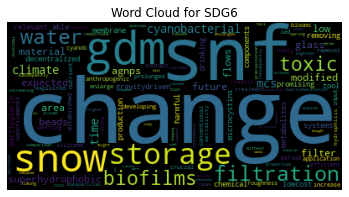

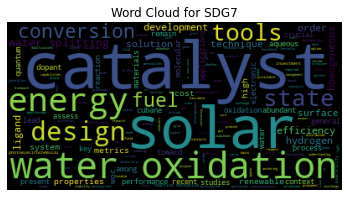

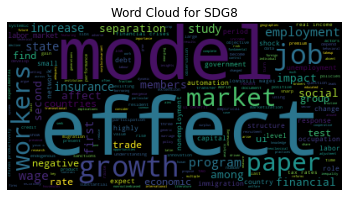

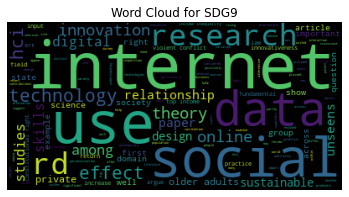

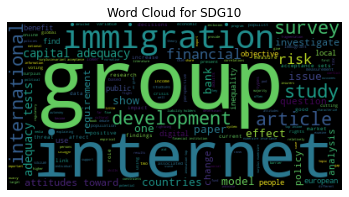

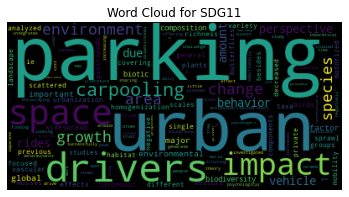

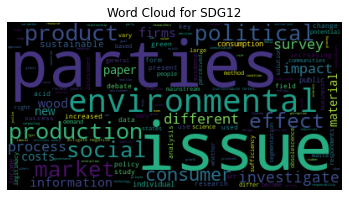

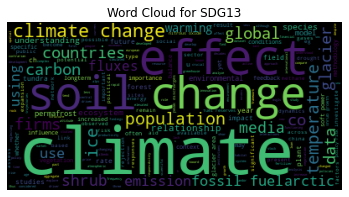

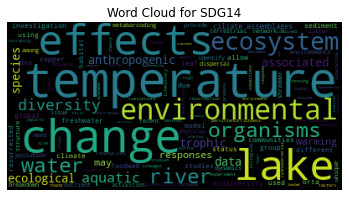

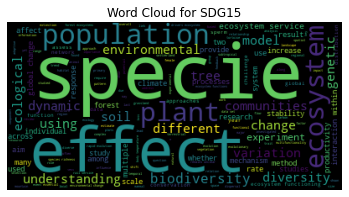

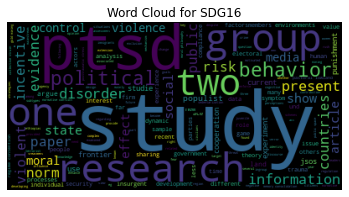

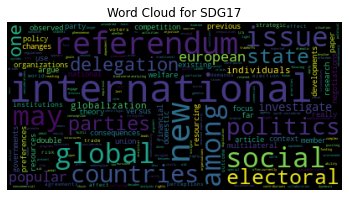

In [18]:
# word clouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt

list_of_sdgs = df5["sdg"].explode().unique() 

for i in list_of_sdgs:
  df_word_cloud = df5[df5['sdg'] == i] 
  text = WordCloud().generate(df_word_cloud['kurzfassung_cleaned'].to_string())
  plt.imshow(text)
  plt.title("Word Cloud for SDG"+str(i))
  plt.axis("off")
  plt.show()

# PySpark

From this section PySpark is being used for:
- Word2Vec
- StringIndexig
- OneHotEncoding


In [19]:
# install pyspark for pyspark approach
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 44 kB/s 
     |████████████████████████████████| 199 kB 46.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=0ec2858915de0daf4ed32bff66aef8af82779cb97a6b0424b88dd7f2059c7f72
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


In [20]:
from pyspark.sql import SparkSession

# create a spark session
spark = SparkSession.builder.master("local[*]").getOrCreate()


In [21]:
spark_df = spark.createDataFrame(df5) 


In [22]:
spark_df.printSchema()

root
 |-- sdg: long (nullable = true)
 |-- author: string (nullable = true)
 |-- title_cleaned: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- kurzfassung_cleaned: array (nullable = true)
 |    |-- element: string (containsNull = true)



In [23]:
# word vectors for text columns
from pyspark.ml.feature import Word2Vec

def word_vectorizer(df, col, col_new):

    #create an average word vector for text columns
    word2vec = Word2Vec(vectorSize = 10, minCount = 3, inputCol = col, outputCol = col_new)
    model = word2vec.fit(df)
    message_w2vec = model.transform(df)

    # drop original column
    message_w2vec = message_w2vec.drop(col)

    return message_w2vec

# Apply function for text columns
# titel
col = 'title_cleaned'
col_new = 'title_vectorized'
df6 =  word_vectorizer(spark_df, col, col_new)

# kurzfassung
col = 'kurzfassung_cleaned'
col_new = 'kurzfassung_vectorized'
df7 =  word_vectorizer(df6, col, col_new)

In [24]:
df7.printSchema()

root
 |-- sdg: long (nullable = true)
 |-- author: string (nullable = true)
 |-- title_vectorized: vector (nullable = true)
 |-- kurzfassung_vectorized: vector (nullable = true)



In [25]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder


In [26]:
# string indexer for author

def category_index(df, col, col_new):

    indexer = StringIndexer(inputCol = col, outputCol = col_new) 
    model = indexer.fit(df)
    index_df = model.transform(df)
    
    #drop old columns
    index_df = index_df.drop(col)

    return index_df

#apply function for author

col = 'author'
col_new = 'author_index'
df8 = category_index(df7, col, col_new)


In [27]:
df8.printSchema()

root
 |-- sdg: long (nullable = true)
 |-- title_vectorized: vector (nullable = true)
 |-- kurzfassung_vectorized: vector (nullable = true)
 |-- author_index: double (nullable = false)



In [28]:
# one hot encoder

def encoding(df, col, col_new):

        onehot_encoder = OneHotEncoder(inputCol = col, outputCol = col_new)
        onehot_df = onehot_encoder.fit(df).transform(df)
        
        #drop old column
        onehot_df = onehot_df.drop(col)
        
        return onehot_df

    

#apply function


col = 'author_index'
col_new = 'author_encoded'
df9 = encoding(df8, col, col_new)


In [29]:
df9.printSchema()

root
 |-- sdg: long (nullable = true)
 |-- title_vectorized: vector (nullable = true)
 |-- kurzfassung_vectorized: vector (nullable = true)
 |-- author_encoded: vector (nullable = true)



In [30]:
df9_grouped = df9.groupby('sdg').count()
df9_grouped.show()

+---+-----+
|sdg|count|
+---+-----+
|  7|   17|
|  6|    3|
|  9|   14|
|  5|   23|
|  1|    6|
| 10|   33|
|  3|   44|
| 12|   31|
|  8|   26|
| 11|    3|
|  2|   14|
|  4|    2|
| 17|    8|
| 13|   41|
| 14|   14|
| 15|   88|
| 16|   34|
+---+-----+



# Main Model
In this section the main model is trained.

In [31]:
# data split into train and test

(trainDF, testDF) = df9.randomSplit([0.7, 0.3], seed=12)

trainDF2 = trainDF.groupby('sdg').count()
trainDF2.show()

testDF2 = testDF.groupby('sdg').count()
testDF2.show()

+---+-----+
|sdg|count|
+---+-----+
|  7|   13|
|  6|    1|
|  9|    9|
|  5|   16|
|  1|    4|
| 10|   25|
|  3|   33|
| 12|   24|
|  8|   17|
| 11|    2|
|  2|   11|
|  4|    1|
| 17|    5|
| 13|   30|
| 14|   11|
| 15|   66|
| 16|   25|
+---+-----+

+---+-----+
|sdg|count|
+---+-----+
|  7|    4|
|  6|    2|
|  9|    5|
|  5|    7|
|  1|    2|
| 10|    8|
|  3|   11|
| 12|    7|
|  8|    9|
| 11|    1|
|  2|    3|
|  4|    1|
| 17|    3|
| 13|   11|
| 14|    3|
| 15|   22|
| 16|    9|
+---+-----+



In [ ]:
# main model

from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


if __name__ == "__main__":
    spark = SparkSession \
    .builder \
    .appName("MulticlassLogisticRegressionWithElasticNet") \
    .getOrCreate()

df10 = df9.withColumnRenamed('sdg', 'label')

feature = df10.drop("label").columns
print(feature)



(trainDF, testDF) = df10.randomSplit([0.7, 0.3], seed=12)

# This includes both the numeric columns and the one-hot encoded binary vector columns in our dataset.
vecAssembler = VectorAssembler(inputCols=feature, outputCol="features")

# maxIter=10, regParam=0.3, elasticNetParam=0.8
lr = LogisticRegression()

#Build the Pipeline
# Define the pipeline based on the stages created in previous steps.
pipeline = Pipeline(stages=[vecAssembler, lr])

# Define the pipeline model.
pipelineModel = pipeline.fit(trainDF)


# Create model.
lrModel = pipelineModel.stages[-1]
    
print("#######\n#######\n#######\n")
print("Now printing: Model test")

# Print the coefficients and intercept for multinomial logistic regression
print("Coefficients: \n" + str(lrModel.coefficientMatrix))
print("Intercept: " + str(lrModel.interceptVector))

trainingSummary = lrModel.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

# for multiclass, we can inspect metrics on a per-label basis
print("False positive rate by label:")
for i, rate in enumerate(trainingSummary.falsePositiveRateByLabel):
    print("label %d: %s" % (i+1, rate))

print("True positive rate by label:")
for i, rate in enumerate(trainingSummary.truePositiveRateByLabel):
    print("label %d: %s" % (i+1, rate))

print("Precision by label:")
for i, prec in enumerate(trainingSummary.precisionByLabel):
    print("label %d: %s" % (i+1, prec))

print("Recall by label:")
for i, rec in enumerate(trainingSummary.recallByLabel):
    print("label %d: %s" % (i+1, rec))

print("F-measure by label:")
for i, f in enumerate(trainingSummary.fMeasureByLabel()):
    print("label %d: %s" % (i+1, f))

accuracy = trainingSummary.accuracy
falsePositiveRate = trainingSummary.weightedFalsePositiveRate
truePositiveRate = trainingSummary.weightedTruePositiveRate
fMeasure = trainingSummary.weightedFMeasure()
precision = trainingSummary.weightedPrecision
recall = trainingSummary.weightedRecall
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
    % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

print("#######\n#######\n#######\n")
print("Now printing: Model validation prediction")

# Apply the pipeline model to the test dataset.
validation_prediction = pipelineModel.transform(testDF)

#Display the predictions from the model. The features column is a sparse vector, which is often the case after one-hot encoding, #because there are so many 0 values
validation_prediction.select("features", "label", "prediction").show()

#Evaluate the model
#The display command has a built-in ROC curve option.

print(pipelineModel.stages[-1], validation_prediction.drop("prediction", "rawPrediction"), "ROC")

mcEvaluator = MulticlassClassificationEvaluator(metricName="accuracy")
print(f"Accuracy: {mcEvaluator.evaluate(validation_prediction)}")


['title_vectorized', 'kurzfassung_vectorized', 'author_encoded']
#######
#######
#######

Now printing: Model test
Coefficients: 
DenseMatrix([[-5.03405055e+00, -1.38865201e+01, -2.35882543e+01, ...,
               1.19446393e+00,  1.02759590e+00,  0.00000000e+00],
             [ 3.56193682e+03,  2.88795751e+03,  2.19657854e+02, ...,
              -6.38054788e+00, -7.18727113e+00,  0.00000000e+00],
             [ 4.12383394e+03, -1.42694535e+02, -2.22173403e+03, ...,
              -1.94157370e+01, -1.46260767e+01,  0.00000000e+00],
             ...,
             [ 1.30094275e+03, -1.44514893e+03,  3.30818395e+02, ...,
              -5.12907274e+01, -7.92185221e+01,  0.00000000e+00],
             [-1.23788876e+03,  8.26044002e+02,  9.68415385e+02, ...,
              -3.35969158e+01, -3.58283921e+01,  0.00000000e+00],
             [-3.45296280e+03, -2.89818853e+03,  8.90036255e+02, ...,
              -2.12246066e+00, -6.22629438e+00,  0.00000000e+00]])
Intercept: [-1.1742065082124367,251

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be remo

<Figure size 3600x3600 with 0 Axes>

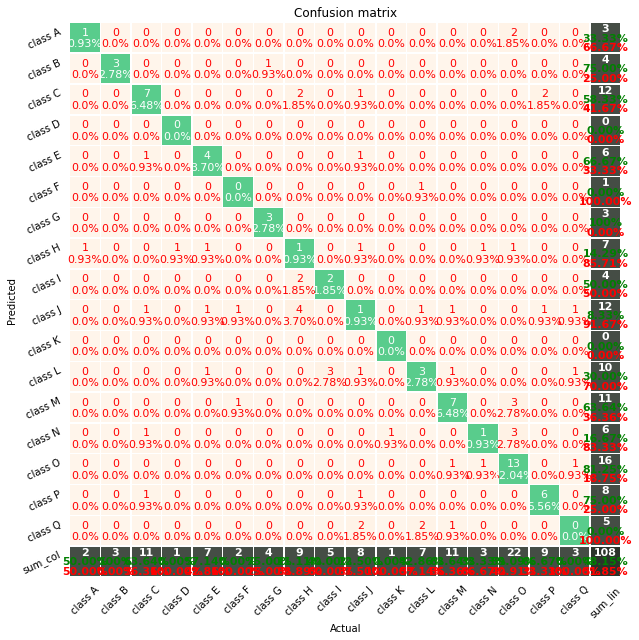

<Figure size 3600x3600 with 0 Axes>

In [43]:
# confusion  matrix for the main model
# SDGs 1-17 are names as classes from A-Q

!pip install pretty-confusion-matrix
import numpy as np
from pretty_confusion_matrix import pp_matrix_from_data
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pretty_confusion_matrix import pp_matrix

figure(figsize=(50, 50))

pd_df_validation = validation_prediction.select('label', 'prediction').toPandas()

y_test = pd_df_validation["label"].values
predic = pd_df_validation["prediction"].values

pp_matrix_from_data(y_test, predic)

plt.figure(figsize=(50, 50))
plt.show()



In [45]:
# Quality check on how the model performs on each different SDG
from pyspark.sql.functions import sum, col, desc
from pyspark.sql import functions as F

validation_count = validation_prediction.groupby('label', 'prediction').count()
validation_count = validation_count.sort(desc("count"))
validation_count.show(200)
y = validation_prediction.count()


data_collect = validation_count.collect()

x = 0
# looping thorough each row of the dataframe
for row in data_collect:
    if row['label'] == row['prediction']:
      x += row['count']

acc = x / y
print("accuracy:", acc)

to_check_sdg = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
d_error_by_label = {}
cols_to_drop_later = ['label', 'prediction']

for iii in to_check_sdg:
  new_df_validation = validation_count.filter(col("label") == iii)
  dfxx = new_df_validation.toPandas()
  listxx = dfxx['count'].tolist()
  #print(listxx)
  count_total = 0.0
  for x in listxx:
    count_total += x
  count_total *= 1.0
  print("count_total",count_total)

  dfxxx = dfxx[dfxx['label'] != dfxx['prediction']]
  listxx = dfxxx['count'].tolist()
  count_total_errors = 0.0
  for x in listxx:
    count_total_errors += x
  count_total_errors *= 1.0
  print("count_total_errors",count_total_errors)
  d_error_by_label[iii] = 1 - count_total_errors/count_total

print("errors:", d_error_by_label)


+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|   15|      15.0|   13|
|    3|       3.0|    7|
|   13|      13.0|    7|
|   16|      16.0|    6|
|    5|       5.0|    4|
|    8|      10.0|    4|
|    9|      12.0|    3|
|   12|      12.0|    3|
|    2|       2.0|    3|
|    7|       7.0|    3|
|   15|      13.0|    3|
|   15|      14.0|    3|
|   12|      17.0|    2|
|   10|      17.0|    2|
|   16|       3.0|    2|
|   15|       1.0|    2|
|    9|       9.0|    2|
|    8|       3.0|    2|
|    8|       9.0|    2|
|    5|       8.0|    1|
|    3|      14.0|    1|
|    3|      16.0|    1|
|    5|      12.0|    1|
|    6|      13.0|    1|
|   10|      12.0|    1|
|   10|      16.0|    1|
|   10|       5.0|    1|
|   11|      14.0|    1|
|    8|       8.0|    1|
|   10|      10.0|    1|
|   13|      15.0|    1|
|    3|      10.0|    1|
|    1|       8.0|    1|
|    4|       8.0|    1|
|    5|      10.0|    1|
|    7|       2.0|    1|
|    1|       1.0|    1|


# Balanced Model
In this part the model flow is tested on a balanced dataset for which SDG 3, 6, 11 and 17 have been dropped and the data has been resampled for all other SDGs to contain approximately 14 entries each.

This is purely for testing reasons.

In [ ]:
df9_grouped.show()

+---+-----+
|sdg|count|
+---+-----+
|  7|   17|
|  6|    3|
|  9|   14|
|  5|   23|
|  1|    6|
| 10|   33|
|  3|   44|
| 12|   31|
|  8|   26|
| 11|    3|
|  2|   14|
|  4|    2|
| 17|    8|
| 13|   41|
| 14|   14|
| 15|   88|
| 16|   33|
+---+-----+



In [ ]:
pre_sample = df9.where(df9.sdg != 1)
pre_sample = pre_sample.where(pre_sample.sdg != 4)
pre_sample = pre_sample.where(pre_sample.sdg != 6)
pre_sample = pre_sample.where(pre_sample.sdg != 11)
pre_sample = pre_sample.where(pre_sample.sdg != 17)


x2 = 14 / pre_sample.select('sdg').where(pre_sample.sdg == '2').count()
x3 = 14 / pre_sample.select('sdg').where(pre_sample.sdg == '3').count()
x5 = 14 / pre_sample.select('sdg').where(pre_sample.sdg == '5').count()
x7 = 14 / pre_sample.select('sdg').where(pre_sample.sdg == '7').count()
x8 = 14 / pre_sample.select('sdg').where(pre_sample.sdg == '8').count()
x9 = 14 / pre_sample.select('sdg').where(pre_sample.sdg == '9').count()
x10 = 14 / pre_sample.select('sdg').where(pre_sample.sdg == '10').count()
x12 = 14 / pre_sample.select('sdg').where(pre_sample.sdg == '12').count()
x13 = 14 / pre_sample.select('sdg').where(pre_sample.sdg == '13').count()
x14 = 14 / pre_sample.select('sdg').where(pre_sample.sdg == '14').count()
x15 = 14 / pre_sample.select('sdg').where(pre_sample.sdg == '15').count()
x16 = 14 / pre_sample.select('sdg').where(pre_sample.sdg == '16').count()

sampled = pre_sample.sampleBy('sdg', fractions={2: x2, 3: x3, 5: x5, 7: x7, 8: x8, 9: x9, 10: x10, 12: x12, 13: x13, 14: x14, 15: x15, 16: x16}, seed=123)

sampled_c = sampled.groupBy('sdg').count()

unlabelled = pre_sample.subtract(sampled)


In [ ]:
sampled_c.show()
print(x3)

+---+-----+
|sdg|count|
+---+-----+
|  7|   15|
|  9|   14|
|  5|   12|
| 10|   12|
|  3|   14|
| 12|   17|
|  8|   17|
|  2|   14|
| 13|   12|
| 14|   14|
| 15|   13|
| 16|   12|
+---+-----+

0.3181818181818182


In [ ]:
# balanced model

if __name__ == "__main__":
    spark = SparkSession \
    .builder \
    .appName("MulticlassLogisticRegressionWithElasticNet") \
    .getOrCreate()

df10 = sampled.withColumnRenamed('sdg', 'label').drop('author_encoded').drop('title_vectorized')
unlabelled = unlabelled.withColumnRenamed('sdg', 'label')

feature = df10.drop("label").columns
print(feature)

sdg_list = [2, 3, 5, 7, 8, 9, 10, 12, 13, 14, 15, 16]


(trainDF, testDF) = df10.randomSplit([0.7, 0.3], seed=12)

# This includes both the numeric columns and the one-hot encoded binary vector columns in our dataset.
vecAssembler = VectorAssembler(inputCols=feature, outputCol="features")


lr = LogisticRegression()

#Build the Pipeline
# Define the pipeline based on the stages created in previous steps.
pipeline = Pipeline(stages=[vecAssembler, lr])

# Define the pipeline model.
pipelineModel = pipeline.fit(trainDF)


# Create model.
lrModel = pipelineModel.stages[-1]
    
print("#######\n#######\n#######\n")
print("Now printing: Model test")

# Print the coefficients and intercept for multinomial logistic regression
print("Coefficients: \n" + str(lrModel.coefficientMatrix))
print("Intercept: " + str(lrModel.interceptVector))

trainingSummary = lrModel.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

# for multiclass, we can inspect metrics on a per-label basis
print("False positive rate by label:")
for i, rate in enumerate(trainingSummary.falsePositiveRateByLabel):
    print("label %d: %s" % (sdg_list[i], rate))

print("True positive rate by label:")
for i, rate in enumerate(trainingSummary.truePositiveRateByLabel):
    print("label %d: %s" % (sdg_list[i], rate))

print("Precision by label:")
for i, prec in enumerate(trainingSummary.precisionByLabel):
    print("label %d: %s" % (sdg_list[i], prec))

print("Recall by label:")
for i, rec in enumerate(trainingSummary.recallByLabel):
    print("label %d: %s" % (sdg_list[i], rec))

print("F-measure by label:")
for i, f in enumerate(trainingSummary.fMeasureByLabel()):
    print("label %d: %s" % (sdg_list[i], f))

accuracy = trainingSummary.accuracy
falsePositiveRate = trainingSummary.weightedFalsePositiveRate
truePositiveRate = trainingSummary.weightedTruePositiveRate
fMeasure = trainingSummary.weightedFMeasure()
precision = trainingSummary.weightedPrecision
recall = trainingSummary.weightedRecall
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
    % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

print("#######\n#######\n#######\n")
print("Now printing: Model validation prediction")

# Apply the pipeline model to the test dataset.
validation_prediction = pipelineModel.transform(testDF)

#Display the predictions from the model. The features column is a sparse vector, which is often the case after one-hot encoding, #because there are so many 0 values
validation_prediction.select("features", "label", "prediction").show()

#Evaluate the model
#The display command has a built-in ROC curve option.

print(pipelineModel.stages[-1], validation_prediction.drop("prediction", "rawPrediction"), "ROC")

mcEvaluator = MulticlassClassificationEvaluator(metricName="accuracy")
print(f"Accuracy: {mcEvaluator.evaluate(validation_prediction)}")

print("Now printing: Model unlabelled prediction")

# Apply the pipeline model to the test dataset.
unlabelled_prediction = pipelineModel.transform(unlabelled)

#Display the predictions from the model. The features column is a sparse vector, which is often the case after one-hot encoding, #because there are so many 0 values
unlabelled_prediction.select("label", "prediction").show(100)


['kurzfassung_vectorized']
#######
#######
#######

Now printing: Model test
Coefficients: 
DenseMatrix([[ 5.21895059e+00, -1.51846742e+01,  7.67989385e+00,
               9.13008905e+00, -1.95806662e+00, -7.20637914e-02,
               1.29037713e+01, -3.98681040e+00, -9.71964208e-01,
              -1.02106534e+01],
             [ 5.21895059e+00, -1.51846742e+01,  7.67989385e+00,
               9.13008905e+00, -1.95806662e+00, -7.20637914e-02,
               1.29037713e+01, -3.98681040e+00, -9.71964208e-01,
              -1.02106534e+01],
             [ 2.35683704e+02,  1.70529526e+02,  2.74891846e+02,
              -1.89579072e+02,  2.81238087e+02,  2.82724082e+02,
               1.99333503e+02,  2.33680318e+02, -2.27398920e+02,
              -2.19439066e+02],
             [-2.97414609e+02, -5.04891807e+01, -1.80679884e+02,
              -1.16666230e+01, -1.46311288e+02,  1.72260022e+02,
               2.16986051e+01, -1.31890750e+02, -6.79531922e+01,
              -7.52579331e+01],


In [ ]:
# QC for the balanced model
unlabelled_count = unlabelled_prediction.groupby('label', 'prediction').count()
unlabelled_count.show(212)
y = unlabelled_prediction.count()
print(19/212)

data_collect = unlabelled_count.collect()

x = 0
# looping thorough each row of the dataframe
for row in data_collect:
    if row['label'] == row['prediction']:
      x += row['count']

acc = x / y
print("accuracy:", acc)

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|   15|      13.0|   30|
|    3|       2.0|    3|
|    8|      13.0|    1|
|    3|      15.0|    3|
|   10|      13.0|    1|
|   15|      15.0|   14|
|    5|      16.0|    2|
|   10|       9.0|    3|
|   13|      16.0|    1|
|   16|       3.0|    1|
|    3|      14.0|    1|
|    8|       5.0|    1|
|    5|      13.0|    1|
|    8|       3.0|    1|
|   15|      14.0|   19|
|   13|       2.0|    5|
|   13|       7.0|    4|
|   10|      10.0|    5|
|   16|       8.0|    1|
|   15|       2.0|    3|
|   16|      10.0|    2|
|   16|      13.0|    1|
|    3|      16.0|    6|
|   12|       9.0|    3|
|   10|      12.0|    2|
|    8|       2.0|    1|
|   10|       8.0|    1|
|   10|      16.0|    5|
|   15|      16.0|    4|
|    5|       5.0|    5|
|   15|       7.0|    2|
|    5|       2.0|    1|
|    7|      12.0|    1|
|   16|       5.0|    2|
|   16|      16.0|    5|
|    5|      12.0|    1|
|    3|       9.0|    4|


# Oversampled Model

In this part the model flow is tested on a oversampled dataset, where the data has been upsampled for all other SDGs to contain approximately 15000 entries each.

This is purely for testing reasons.

In [ ]:
(trainDF, testDF) = df10.randomSplit([0.7, 0.3], seed=12)

trainDF2 = trainDF.groupby('label').count()
trainDF2.show()

testDF2 = testDF.groupby('label').count()
testDF2.show()

+-----+-----+
|label|count|
+-----+-----+
|    7|   12|
|    9|    8|
|    5|   10|
|   10|    9|
|    3|    8|
|   12|   12|
|    8|   13|
|    2|   11|
|   13|   11|
|   14|    8|
|   15|   10|
|   16|   10|
+-----+-----+

+-----+-----+
|label|count|
+-----+-----+
|    7|    3|
|    9|    6|
|    5|    2|
|   10|    3|
|    3|    6|
|   12|    5|
|    8|    4|
|    2|    3|
|   13|    1|
|   14|    6|
|   15|    3|
|   16|    2|
+-----+-----+



In [ ]:
df_over = df9.sample(True, 10000.09, 123)
df_over_count = df_over.groupby('sdg').count()
df_over_count.show()

+---+------+
|sdg| count|
+---+------+
|  7|170738|
|  6| 29911|
|  9|140135|
|  5|230857|
|  1| 60462|
| 10|329936|
|  3|440019|
| 12|309711|
|  8|259617|
| 11| 30170|
|  2|139672|
|  4| 20060|
| 17| 79966|
| 13|409442|
| 14|139818|
| 15|880906|
| 16|330155|
+---+------+



In [ ]:
pre_sample = df_over

x1 = 15000 / pre_sample.select('sdg').where(pre_sample.sdg == '1').count()
x2 = 15000 / pre_sample.select('sdg').where(pre_sample.sdg == '2').count()
x3 = 15000 / pre_sample.select('sdg').where(pre_sample.sdg == '3').count()
x4 = 15000 / pre_sample.select('sdg').where(pre_sample.sdg == '4').count()
x5 = 15000 / pre_sample.select('sdg').where(pre_sample.sdg == '5').count()
x6 = 15000 / pre_sample.select('sdg').where(pre_sample.sdg == '6').count()
x7 = 15000 / pre_sample.select('sdg').where(pre_sample.sdg == '7').count()
x8 = 15000 / pre_sample.select('sdg').where(pre_sample.sdg == '8').count()
x9 = 15000 / pre_sample.select('sdg').where(pre_sample.sdg == '9').count()
x10 = 15000 / pre_sample.select('sdg').where(pre_sample.sdg == '10').count()
x11 = 15000 / pre_sample.select('sdg').where(pre_sample.sdg == '11').count()
x12 = 15000 / pre_sample.select('sdg').where(pre_sample.sdg == '12').count()
x13 = 15000 / pre_sample.select('sdg').where(pre_sample.sdg == '13').count()
x14 = 15000 / pre_sample.select('sdg').where(pre_sample.sdg == '14').count()
x15 = 15000 / pre_sample.select('sdg').where(pre_sample.sdg == '15').count()
x16 = 15000 / pre_sample.select('sdg').where(pre_sample.sdg == '16').count()
x17 = 15000 / pre_sample.select('sdg').where(pre_sample.sdg == '17').count()

sampled = pre_sample.sampleBy('sdg', fractions={1: x1, 2: x2, 3: x3, 4: x4, 5: x5, 6: x6, 7: x7, 8: x8, 9: x9, 10: x10, 11: x11, 12: x12, 13: x13, 14: x14, 15: x15, 16: x16, 17: x17}, seed=123)

sampled_c = sampled.groupBy('sdg').count()

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


if __name__ == "__main__":
    spark = SparkSession \
    .builder \
    .appName("MulticlassLogisticRegressionWithElasticNet") \
    .getOrCreate()

df10 = sampled.withColumnRenamed('sdg', 'label')

feature = df10.drop("label").columns
print(feature)



(trainDF, testDF) = df10.randomSplit([0.7, 0.3], seed=12)

# This includes both the numeric columns and the one-hot encoded binary vector columns in our dataset.
vecAssembler = VectorAssembler(inputCols=feature, outputCol="features")

# 10, 0.3, 0.8
lr = LogisticRegression(maxIter=50, regParam=0.99, elasticNetParam=0.0)

#Build the Pipeline
# Define the pipeline based on the stages created in previous steps.
pipeline = Pipeline(stages=[vecAssembler, lr])

# Define the pipeline model.
pipelineModel = pipeline.fit(trainDF)


# Create model.
lrModel = pipelineModel.stages[-1]
    
print("#######\n#######\n#######\n")
print("Now printing: Model test")

# Print the coefficients and intercept for multinomial logistic regression
print("Coefficients: \n" + str(lrModel.coefficientMatrix))
print("Intercept: " + str(lrModel.interceptVector))

trainingSummary = lrModel.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

# for multiclass, we can inspect metrics on a per-label basis
print("False positive rate by label:")
for i, rate in enumerate(trainingSummary.falsePositiveRateByLabel):
    print("label %d: %s" % (i+1, rate))

print("True positive rate by label:")
for i, rate in enumerate(trainingSummary.truePositiveRateByLabel):
    print("label %d: %s" % (i+1, rate))

print("Precision by label:")
for i, prec in enumerate(trainingSummary.precisionByLabel):
    print("label %d: %s" % (i+1, prec))

print("Recall by label:")
for i, rec in enumerate(trainingSummary.recallByLabel):
    print("label %d: %s" % (i+1, rec))

print("F-measure by label:")
for i, f in enumerate(trainingSummary.fMeasureByLabel()):
    print("label %d: %s" % (i+1, f))

accuracy = trainingSummary.accuracy
falsePositiveRate = trainingSummary.weightedFalsePositiveRate
truePositiveRate = trainingSummary.weightedTruePositiveRate
fMeasure = trainingSummary.weightedFMeasure()
precision = trainingSummary.weightedPrecision
recall = trainingSummary.weightedRecall
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
    % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

print("#######\n#######\n#######\n")
print("Now printing: Model validation prediction")

# Apply the pipeline model to the test dataset.
validation_prediction = pipelineModel.transform(testDF)

#Display the predictions from the model. The features column is a sparse vector, which is often the case after one-hot encoding, #because there are so many 0 values
validation_prediction.select("features", "label", "prediction").show()

#Evaluate the model
#The display command has a built-in ROC curve option.

print(pipelineModel.stages[-1], validation_prediction.drop("prediction", "rawPrediction"), "ROC")

mcEvaluator = MulticlassClassificationEvaluator(metricName="accuracy")
print(f"Accuracy: {mcEvaluator.evaluate(validation_prediction)}")




['title_vectorized', 'kurzfassung_vectorized', 'author_encoded']
#######
#######
#######

Now printing: Model test
Coefficients: 
DenseMatrix([[ 3.57057030e-05,  2.44812753e-05,  1.17538323e-05, ...,
               0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
             [ 3.57057030e-05,  2.44812753e-05,  1.17538323e-05, ...,
               0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
             [ 5.96197316e+00,  9.59228201e-01, -1.87011192e-01, ...,
               0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
             ...,
             [-3.47664677e+00,  1.52771016e+00,  4.09387696e-01, ...,
               0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
             [ 2.07333431e+00,  6.42836249e-01,  4.04645460e+00, ...,
               0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
             [ 1.09055494e+00,  8.98101792e-01,  2.08831407e+00, ...,
               0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])
Intercept: [-10.279223404208993,-10